#S09 T02: Aprenentatge Supervisat - Regressions


Anem a practicar i a familiaritzar-nos amb regressions
## Nivell 1

### - Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

### - Exercici 2

Compara’ls en base al MSE i al R2 .


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
#from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge,  HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
file="DelayedFlights.csv"
df = pd.read_csv(file,low_memory=False,index_col=0)
df.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


    Year -> any de la dada format yyyy
    Month -> mes de la dada format mm
    DayofMonth -> dia del mes 1-31
    DayOfWeek -> dia de la setmana 1 (Monday) - 7 (Sunday)
    DepTime -> hora de sortida (local, hhmm)
    CRSDepTime -> hora programada de sortida (local, hhmm)
    ArrTime -> hora de arrivada (local, hhmm)
    CRSArrTime -> hora programda de arrivada (local, hhmm)
    UniqueCarrier -> identificador del operador
    FlightNum -> numero de vol
    TailNum -> matricula del avio
    ActualElapsedTime -> temps de vol total en minuts
    CRSElapsedTime -> temps estimat de vol total en minutos
    AirTime -> temps en el aire en minuts
    ArrDelay -> Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
    DepDelay -> Difference in minutes between scheduled and actual departure time.Early departures show negative numbers, in minutes
    Origin -> codi IATA areoport de origen
    Dest -> codi IATA aeroport de dest
    Distance -> distancia entre aeroports (miles)
    TaxiIn -> Wheels down and arrival at the destination airport gate, in minutes
    TaxiOut -> The time elapsed between departure from the origin airport gate and wheels off, in minutes
    Cancelled -> vol cancelat o no
    CancellationCode -> motiu de la cancelacio (A = carrier, B = weather, C = NAS, D = security)
    Diverted -> Desviat 1 = yes, 0 = no
    CarrierDelay -> Retràs degut a l'operador in minutes
    WeatherDelay -> Retràs degut al temps in minutes
    NASDelay -> Retràs degut a NAS in minutes
    SecurityDelay -> Retràs degut motius de seguretat in minutes
    LateAircraftDelay -> Retràs acumulat de l'avió in minutes


Deveriamos eliminar los vuelos cancelados y Redirigidos ya que afectarian a nuestra prediccion

In [4]:
print(pd.value_counts(df.Cancelled))
print(pd.value_counts(df.Diverted))

0    1936125
1        633
Name: Cancelled, dtype: int64
0    1929004
1       7754
Name: Diverted, dtype: int64


Eliminamos los cancelados y desviado para evitar que interfiran en la predicion

In [5]:
df = df.loc[(df.Cancelled == 0) & (df.Diverted == 0 )]
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

Tenemos algunos delays sin valor, supondremos que el valor es 0 por eso no esta instanciado asi que los instanciaremos a 0

In [6]:
for column in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','SecurityDelay','LateAircraftDelay']:
    df[column]=df[column].fillna(0)
df.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              3
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Seleccionamos las columnas con retraso

In [7]:
df = df.loc[df['ArrDelay']>0] 

Eliminamos algunas columnas que no usuaremos 

In [8]:
df.drop(['Year', 'DayofMonth','CRSDepTime','CRSArrTime','DepTime','Cancelled','CancellationCode','Diverted'], axis=1, inplace=True)
corrMatrix = df.corr()
corrMatrix

,Month,DayOfWeek,ArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,1.000000,0.003053,0.000078,0.001816,0.002253,0.005033,-0.000474,0.005180,0.008821,0.004551,0.020915,0.005262,-0.001789,0.004792,0.007401,-0.002851,0.001191
DayOfWeek,0.003053,1.000000,0.010663,-0.009515,0.003304,0.004739,0.004746,0.008681,0.010742,0.007853,0.010040,-0.009370,0.008281,0.004716,-0.005675,0.003948,0.006923
ArrTime,0.000078,0.010663,1.000000,-0.012339,-0.016768,-0.016629,-0.020675,-0.056232,-0.057869,-0.030819,0.040073,-0.001294,-0.069278,-0.025040,0.032075,-0.006228,-0.027196
FlightNum,0.001816,-0.009515,-0.012339,1.000000,-0.314216,-0.327874,-0.334119,0.047239,0.043255,-0.350224,-0.005316,0.011678,0.056903,0.062163,0.022968,-0.001404,-0.030285
ActualElapsedTime,0.002253,0.003304,-0.016768,-0.314216,1.000000,0.970678,0.974390,0.101313,0.033117,0.951102,0.173469,0.308531,0.027218,0.011031,0.167870,0.006891,-0.002963
CRSElapsedTime,0.005033,0.004739,-0.016629,-0.327874,0.970678,1.000000,0.985915,0.033978,0.037785,0.981857,0.107804,0.139988,0.027452,-0.011870,0.044422,0.005764,-0.002286
AirTime,-0.000474,0.004746,-0.020675,-0.334119,0.974390,0.985915,1.000000,0.036657,0.018037,0.979966,0.089502,0.100640,0.024497,-0.012445,0.060766,0.006994,-0.007178
ArrDelay,0.005180,0.008681,-0.056232,0.047239,0.101313,0.033978,0.036657,1.000000,0.954428,0.014403,0.145396,0.265638,0.537929,0.276408,0.438374,0.007903,0.541136
DepDelay,0.008821,0.010742,-0.057869,0.043255,0.033117,0.037785,0.018037,0.954428,1.000000,0.019873,0.062760,0.053798,0.560291,0.259015,0.295724,0.006576,0.565268
Distance,0.004551,0.007853,-0.030819,-0.350224,0.951102,0.981857,0.979966,0.014403,0.019873,1.000000,0.079454,0.083612,0.025429,-0.019514,0.016850,0.006179,-0.006202


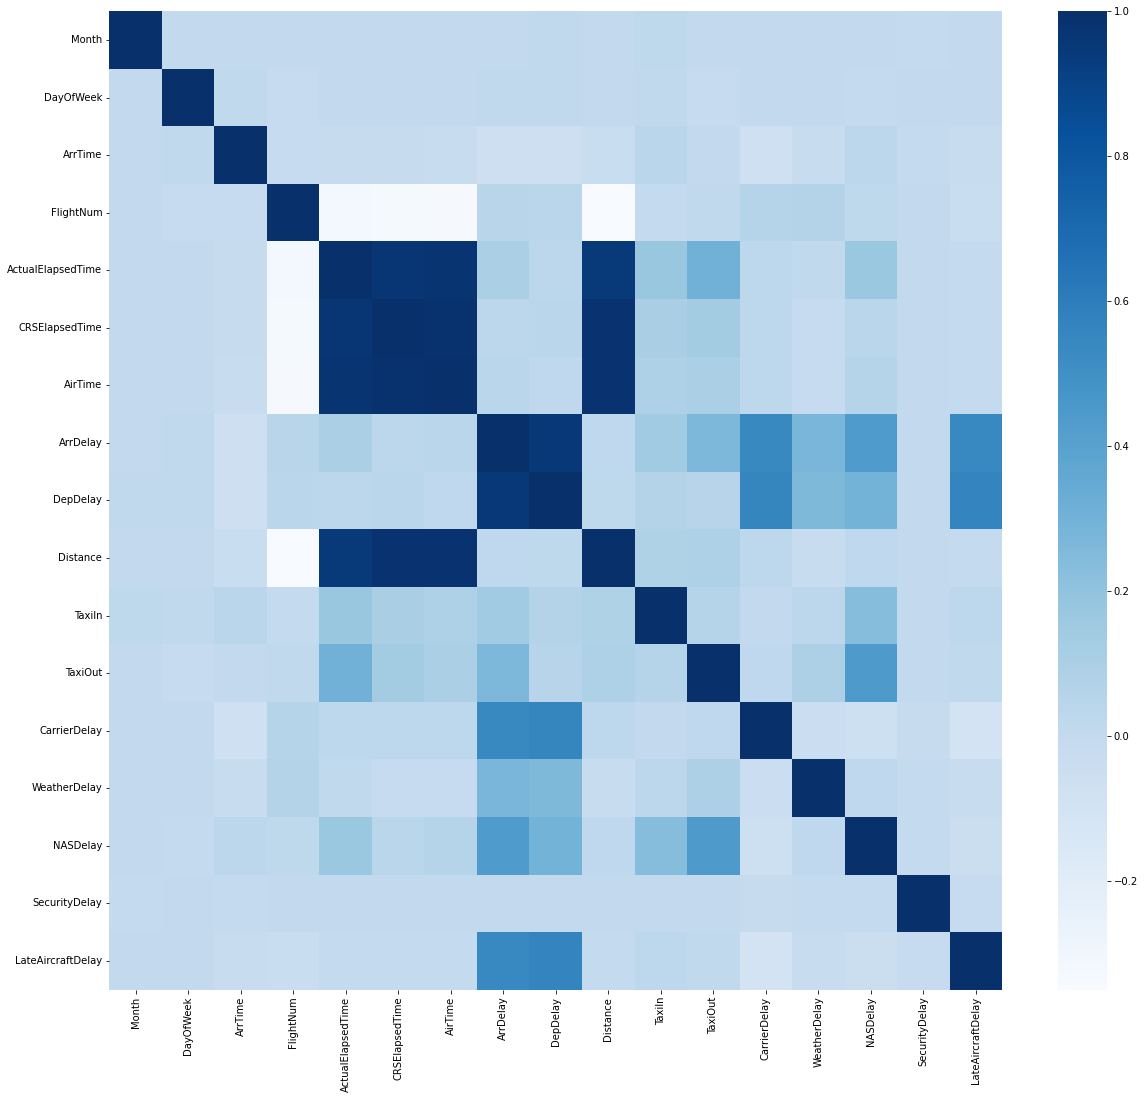

In [9]:
plt.figure(figsize=(20,18))
sns.heatmap(corrMatrix,  cmap=plt.cm.Blues)
plt.show()

In [10]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest'], dtype='object')

In [11]:
df['ArrDelay']

1           2.0
2          14.0
4          34.0
5          11.0
6          57.0
           ... 
7009709    17.0
7009710    25.0
7009717    75.0
7009718    99.0
7009726     9.0
Name: ArrDelay, Length: 1723415, dtype: float64

In [12]:
def get_stats(group):
    return {'count': group.count(),'mean': group.mean()}

UniqueCarrier_delay_stats = df['ArrDelay'].groupby(df['UniqueCarrier']).apply(get_stats).unstack()
UniqueCarrier_delay_stats = UniqueCarrier_delay_stats.sort_values('count')
UniqueCarrier_delay_stats


,count,mean
UniqueCarrier,,
AQ,654.0,26.198777
HA,7199.0,35.827615
F9,25708.0,31.053835
AS,34179.0,42.101202
9E,46896.0,52.097343
B6,48177.0,63.947859
OH,49104.0,54.915261
YV,63289.0,58.563131
FL,65008.0,48.143921


In [13]:
UniqueCarrier_delay_stats = df['ArrDelay'].groupby(df['Dest']).apply(get_stats).unstack()
UniqueCarrier_delay_stats = UniqueCarrier_delay_stats.sort_values('count')
UniqueCarrier_delay_stats

,count,mean
Dest,,
TUP,1.0,6.000000
PIR,3.0,15.000000
BJI,8.0,32.625000
INL,9.0,66.777778
BLI,12.0,24.750000
...,...,...
LAX,52015.0,43.348361
DEN,55626.0,43.087675
DFW,62977.0,48.755196


In [14]:
UniqueCarrier_delay_stats = df['ArrDelay'].groupby(df['Origin']).apply(get_stats).unstack()
UniqueCarrier_delay_stats = UniqueCarrier_delay_stats.sort_values('count')
UniqueCarrier_delay_stats

,count,mean
Origin,,
INL,1.0,15.000000
TUP,1.0,6.000000
BLI,2.0,69.500000
PUB,2.0,74.000000
PIR,2.0,59.500000
...,...,...
LAX,50526.0,40.230119
DEN,65919.0,41.308834
DFW,86937.0,41.730851


In [15]:

df.drop(['UniqueCarrier','TailNum','Origin','Dest'], axis=1, inplace=True)


In [16]:
df['ElapsedDelay']=df.ActualElapsedTime-df.CRSElapsedTime
df.drop(['ActualElapsedTime', 'CRSElapsedTime'], axis=1, inplace=True)


In [17]:
corr = df[df.columns[1:]].corr()['ArrDelay'][:]
corr.sort_values(ascending=False).head(n=10)

ArrDelay             1.000000
DepDelay             0.954428
LateAircraftDelay    0.541136
CarrierDelay         0.537929
NASDelay             0.438374
ElapsedDelay         0.283998
WeatherDelay         0.276408
TaxiOut              0.265638
TaxiIn               0.145396
FlightNum            0.047239
Name: ArrDelay, dtype: float64

In [18]:
df.columns
df.head()

,Month,DayOfWeek,ArrTime,FlightNum,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ElapsedDelay
1,1,4,1002.0,3231,113.0,2.0,19.0,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,-17.0
2,1,4,804.0,448,76.0,14.0,8.0,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0,6.0
4,1,4,1959.0,3920,77.0,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,0.0
5,1,4,2121.0,378,87.0,11.0,25.0,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,-14.0
6,1,4,2037.0,509,230.0,57.0,67.0,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0,-10.0



Multicolinealitat 
La multicolinealidad (o colinealidad) ocurre cuando una variable independiente en un modelo de regresión se correlaciona linealmente con otra variable independiente.
Un método simple para detectar la multicolinealidad en un modelo es usar algo llamado factor de inflación de la varianza o el VIF para cada variable de predicción.

El VIF mide la relación entre la varianza de un coeficiente de regresión dado con solo esa variable en el modelo y la varianza de un coeficiente de regresión dado con todas las variables del modelo.

Un VIF de 1 (el VIF mínimo posible) significa que el predictor probado no está correlacionado con los otros predictores. Un VIF de 1 (el VIF mínimo posible) significa que el predictor probado no está correlacionado con los otros predictores.

Cuanto mayor sea el VIF,

    Cuanto más correlacionado esté un predictor con los otros predictores
    Cuanto más se infla el error estándar
    Cuanto mayor sea el intervalo de confianza
    Es menos probable que un coeficiente se evalúe como estadísticamente significativo.


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(['ArrDelay'],axis=1)
y = df.ArrDelay.values
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [20]:

vif_data[~vif_data.isin([np.inf]).any(1)]

,feature,VIF
0,Month,3.699365
1,DayOfWeek,4.370228
2,ArrTime,7.165741
3,FlightNum,2.458033
4,AirTime,102.856844
5,DepDelay,381.747744
6,Distance,87.889243
7,TaxiIn,2.918710
8,TaxiOut,5.577394
9,CarrierDelay,115.091625


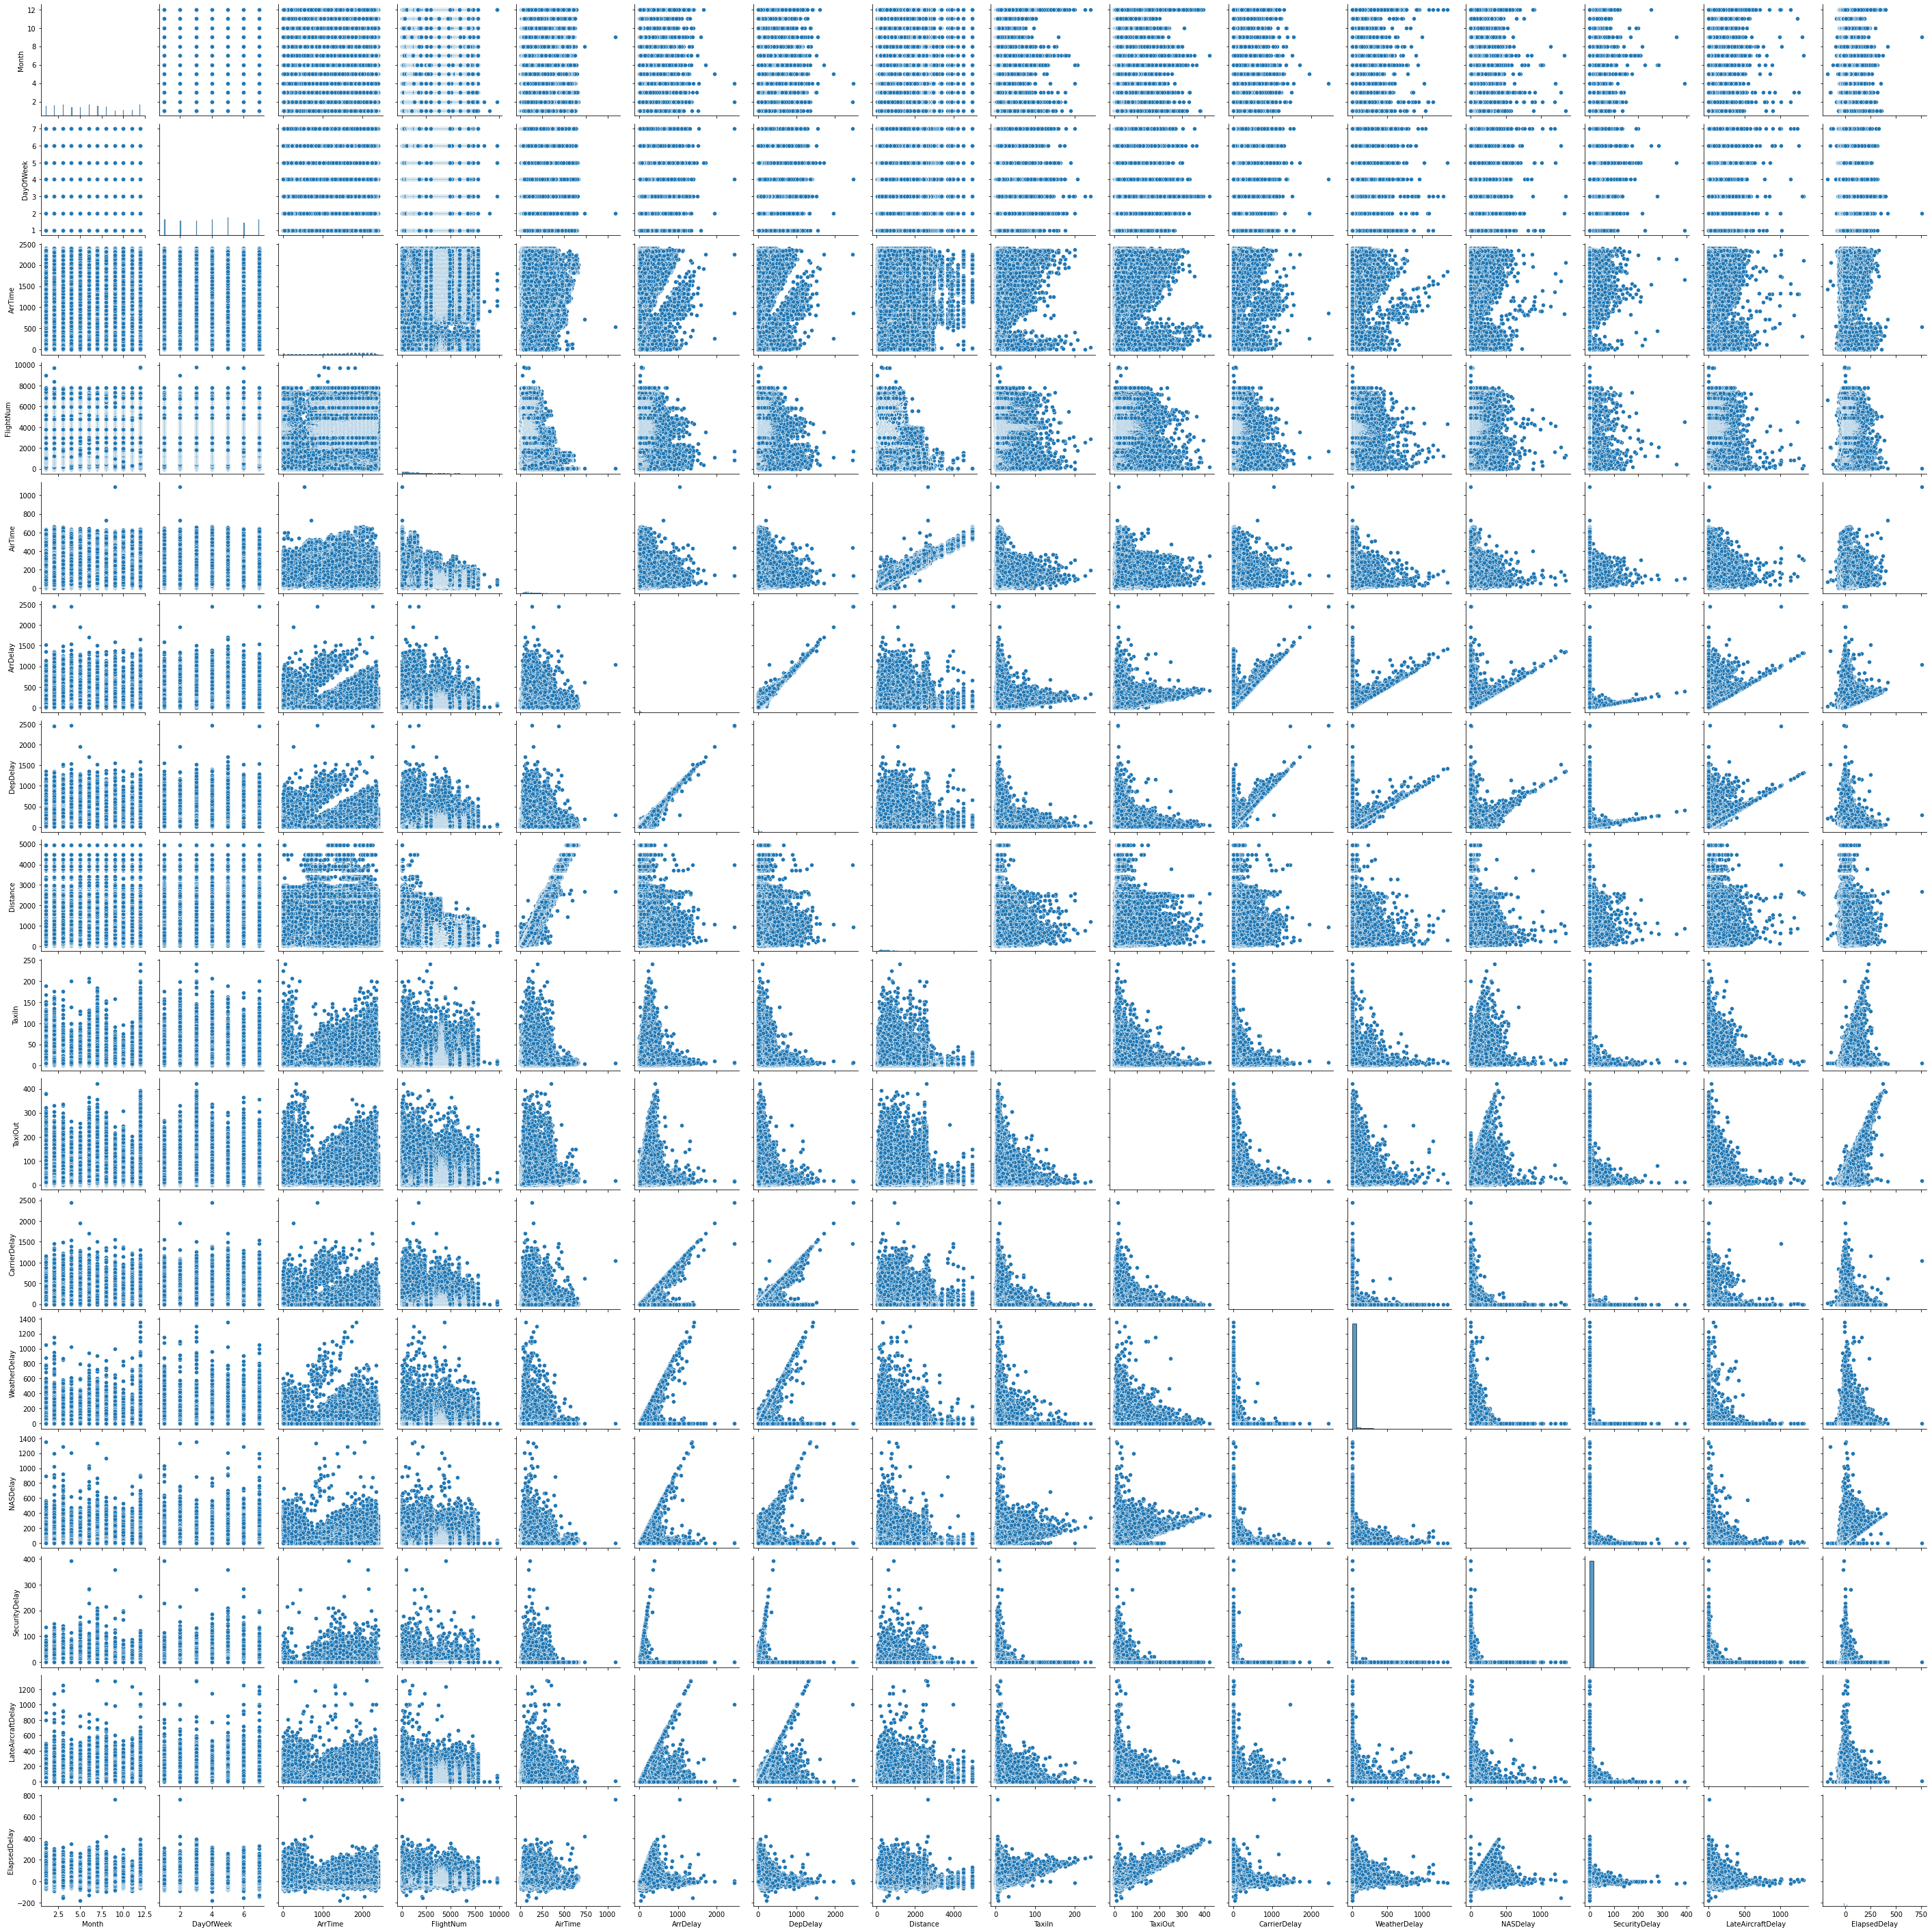

In [21]:

sns.pairplot(df)

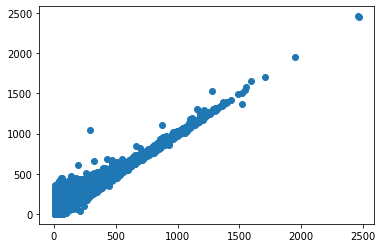

In [22]:
# Represento los datos generados

X = df.DepDelay.values
y = df.ArrDelay.values
plt.scatter(X, y)
plt.show()

In [23]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X.reshape(-1,1),
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [24]:

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))

Coeficiente beta1: [0.9950402]
Intercept: [1.17596131]
Error cuadrático medio: 292.26
Estadístico R_2: 0.91


In [25]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[ 31.0271672 ]
 [110.63038291]
 [ 28.04204661]]

El error (rmse) de test es: 17.265633825633646


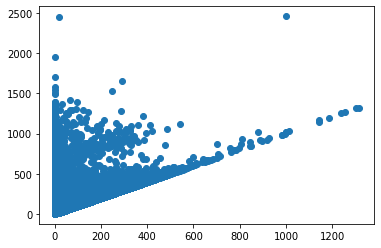

In [26]:

X = df.LateAircraftDelay.values
y = df.ArrDelay.values
plt.scatter(X, y)
plt.show()



In [27]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.reshape(-1,1),
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))

Coeficiente beta1: [0.82615862]
Intercept: [32.77768537]
Error cuadrático medio: 2326.06
Estadístico R_2: 0.29


In [28]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



[[56.7362854 ]
 [32.77768537]
 [32.77768537]]

El error (rmse) de test es: 48.421981512260786


In [29]:
X = df[['LateAircraftDelay','DepDelay']]
y = df.ArrDelay.values
X.shape

(1723415, 2)

In [30]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))



Coeficiente beta1: [0.00407199 0.99347505]
Intercept: [1.17496695]
Error cuadrático medio: 292.25
Estadístico R_2: 0.91


In [31]:

# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


[[ 31.09730623]
 [110.45722291]
 [ 27.99879341]]

El error (rmse) de test es: 17.265637021146325


### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [32]:
X = df.LateAircraftDelay.values
y = df.ArrDelay.values

X_train, X_test, y_train, y_test = train_test_split(
                                        X.reshape(-1,1),
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


modelo = HuberRegressor(max_iter=1000)
modelo.fit(X = X_train.reshape(-1,1), y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))

/home/marcr/Documents/itacademy/Supervitat_Regressio/.venv/lib64/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coeficiente beta1: 0.9010927318289369
Intercept: 17.981567200805234
Error cuadrático medio: 2514.19
Estadístico R_2: 0.23


In [33]:
modelo = Ridge(alpha=0.5, normalize=True)
modelo.fit(X = X_train.reshape(-1,1), y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))


Coeficiente beta1: [0.55077241]
Intercept: [37.81383411]
Error cuadrático medio: 2432.50
Estadístico R_2: 0.26


/home/marcr/Documents/itacademy/Supervitat_Regressio/.venv/lib64/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


### - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

In [34]:
X = df.DepDelay.values.reshape(-1,1)
y = df.ArrDelay.values

X_train, X_test, y_train, y_test = train_test_split(
                                        X.reshape(-1,1),
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

modelo_traintest = LinearRegression()
modelo_alldata= LinearRegression()
modelo_traintest.fit(X = X_train.reshape(-1, 1), y = y_train)
modelo_alldata.fit(X = X.reshape(-1, 1), y = y)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1 traintest: {modelo_traintest.coef_[0]}")
print(f"Coeficiente beta1 alldata: {modelo_alldata.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred_traintest = modelo.predict(X_train)
y_pred_alldata = modelo.predict(X)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept traintest:", modelo_traintest.intercept_)
print("Intercept alldata:", modelo_alldata.intercept_)
print('Error cuadrático medio traintest: %.2f' % mean_squared_error(y_train, y_pred_traintest))
print('Error cuadrático medio alldata: %.2f' % mean_squared_error(y, y_pred_alldata))
print('Estadístico R_2 traintest: %.2f' % r2_score(y_train, y_pred_traintest))
print('Estadístico R_2 alldata: %.2f' % r2_score(y, y_pred_alldata))


Coeficiente beta1 traintest: [0.9950402]
Coeficiente beta1 alldata: 0.9953010218448266
Intercept traintest: [1.17596131]
Intercept alldata: 1.1707966487659576
Error cuadrático medio traintest: 1137.76
Error cuadrático medio alldata: 1140.41
Estadístico R_2 traintest: 0.65
Estadístico R_2 alldata: 0.65


vemos que con todos los datos la aproximacion es un poco mejor. el error es menor 

## Nivell 2

### - Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [35]:
import statsmodels.formula.api as smf
reg = smf.ols('ArrDelay ~ DepDelay + LateAircraftDelay', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 8.814e+06
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:27:20   Log-Likelihood:            -7.3413e+06
No. Observations:             1723415   AIC:                         1.468e+07
Df Residuals:                 1723412   BIC:                         1.468e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1700      0.017     68.203      0.000       1.136       1.204
DepDelay              0.9939      0.000   3458.431      0.000       0.993       0.994
LateAircraftDelay     0.0037      0.000      8.681      0.000       0.003       0.004
==============================================================================
Omnibus:                  1230152.420   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42854432.887
Skew:                           3.031   Prob(JB):                         0.00
Kurtosis:                      26.665   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X = df[['LateAircraftDelay','DepDelay','AirTime','Distance','NASDelay','CarrierDelay','WeatherDelay']]
y = df.ArrDelay.values
X_standard = preprocessing.scale(X)



# Creación del modelo
from sklearn.preprocessing import PolynomialFeatures
poly_reg =  PolynomialFeatures(degree = 1)
X_standard_p = poly_reg.fit_transform(X_standard)
modelo = LinearRegression()
modelo.fit(X = X_standard_p, y = y)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_standard_p)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y, y_pred))

Coeficiente beta1: 0.0
Intercept: 47.93051412458055
Error cuadrático medio: 14.14
Estadístico R_2: 1.00



## Nivell 3

### - Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [37]:
X = df[['LateAircraftDelay','AirTime','Distance','NASDelay','CarrierDelay','WeatherDelay']]
y = df.ArrDelay.values


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

# Ahora puedo obtener el coeficiente b_1
print(f"Coeficiente beta1: {modelo.coef_[0]}")
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X_train)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^
print("Intercept:", modelo.intercept_)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_train, y_pred))

Coeficiente beta1: [ 0.96808889 -0.01526221  0.00176572  0.97099831  0.97431343  0.97967035]
Intercept: [3.80309311]
Error cuadrático medio: 15.54
Estadístico R_2: 1.00


In [38]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 4.102543019454343


https://datapeaker.com/big-data/principales-bibliotecas-de-python-para-el-procesamiento-de-imagenes-en-2021/
https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
